### IBM HR Analytics Employee Attrition & Performance


#### About Dataset 

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [636]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# %matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 

### import Data

In [614]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


### Detailed Description of IBM HR Dataset

 - > In this dataset is composed of 35 columns and 1470 rows.

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Read data and calculate number of rows and columns


In [616]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


#### Categorical columns

In [617]:

categorical= df.select_dtypes(include=['object', 'category']).columns
print(categorical)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


### Numerical columns

In [618]:
numerical = df.select_dtypes(include=['int', 'float']).columns
print(numerical)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Missing data


#### Check if the DataFrame any missing values

In [619]:
missing_value = df.isnull().values.any()
# count the number of missing values in each column
num_missing_values = df.isnull().sum()

if missing_value:
    print(f"---> Number of missing values in each column:{num_missing_values}")
else:
    print(" ---> The DataFrame does not have contain any missing values.")

 ---> The DataFrame does not have contain any missing values.


### Duplicate Records

### Check if the DataFrame duplicated records

In [620]:
duplicated_data = df.duplicated()

num_duplicated_data = df.duplicated().sum()
if duplicated_data.any():
    print(f"Number of duplicated records: {num_duplicated_data}")
else:
    print("---> The DataFrame does not contain any dupplicated recorda.")  


---> The DataFrame does not contain any dupplicated recorda.


### Check uniformed values

In [621]:
uniformed_columns = []
for i in df.columns:
    unique_values = df[i].dropna().unique()
    
    if len(unique_values) == 1:
        uniformed_columns.append(i)
if uniformed_columns:
    
    for i in uniformed_columns:
        print("The DataFrame contains columns with uniformed values:", i)
else:
    
    print("The DataFrame does not contain columns with uniformed values.")
      

The DataFrame contains columns with uniformed values: EmployeeCount
The DataFrame contains columns with uniformed values: Over18
The DataFrame contains columns with uniformed values: StandardHours


##### Reassing response variable

Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.

In [622]:
df1 = df.copy()
df1['Attrition'] = df1['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df1["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#### Drop useless 

In [623]:
# Drop useless features and rename the dataframe
df2 = df1.drop(labels = uniformed_columns, axis = 1)

#### Change Object types to categories 



In [624]:
categories_data = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in categories_data:
    df2[col] = df2[col].astype('category')

In [625]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

# Data Analysis 

### 1, What is the attrition rate for the company, and what are the factors that contribute to it?

#### a What is the attrition rate for the company

to calculate the attrition rate for the company, you need to determine the proportion of employees who have left the company compared to the total number of employees. 

In the company, there are 1470 employees. 237 employees who compose 16% of the total number of employee left the company for some reasons. 

Besides that, 1233 employee is currently continuing to work in the same company.




In [626]:
"""
attrition_counts = variable contains the count of employees in each attrition category('Currently Working in Company' and 'Left the Company').
The count of employees who have left the company can be accessed with attrition_counts['Left the Company']. Dividing this count by the sum 
of the counts for both categories gives you the proportion of employees who have left. Multiplying by 100 gives the percentage attrition rate. 
Finally, the attrition rate is rounded to two decimal places using round().
"""
value_counts = df['Attrition'].value_counts(normalize=True)
Attrition_rate = pd.DataFrame({'Attrition': value_counts.index, 'Percentage': value_counts.values}).reset_index(drop=True)

cur_workers = df2['Attrition'].value_counts()[0]
left_workers = df2['Attrition'].value_counts()[1]

print("Currently Working in Company:", cur_workers)
print("Left the Company:", left_workers)

f"""In the company, there are {df['Attrition'].count()} employees. {left_workers} employees who compose 16% of the 
total number of employee left the company for some reasons. Besides that, {cur_workers} employee 
is currently continuing to work in the same company.
"""

Currently Working in Company: 1233
Left the Company: 237


'In the company, there are 1470 employees. 237 employees who compose 16% of the \ntotal number of employee left the company for some reasons. Besides that, 1233 employee \nis currently continuing to work in the same company.\n'

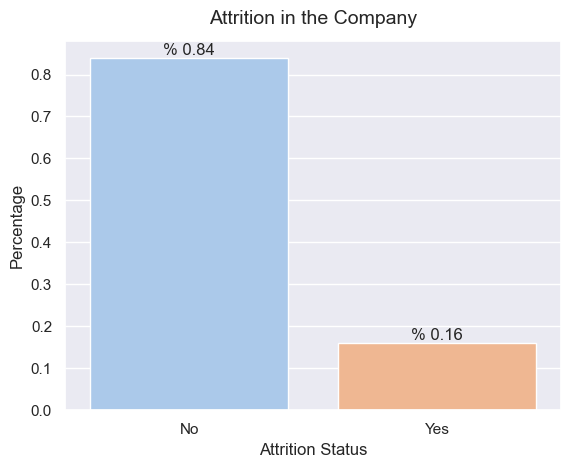

In [627]:
# Visualize attrition rate

palette = sns.color_palette('pastel', 16)
ax = sns.barplot(x= 'Attrition', y= 'Percentage', data= Attrition_rate, palette= palette)
plt.title('Attrition in the Company', fontdict={'fontsize':14}, pad=12)
plt.xlabel('Attrition Status')

# Show bar values over them as percentage
for p in ax.patches:
    ax.annotate(f'% {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#### b- What are the factors that contribute to Attrition?

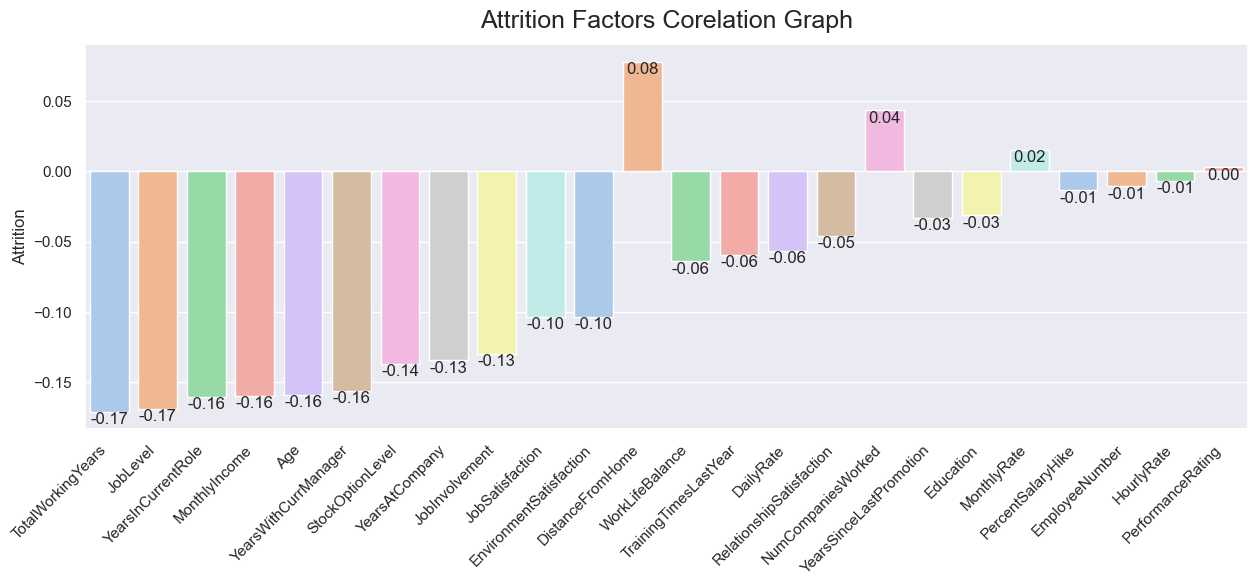

In [628]:
cor_attr = df2.loc[:, df2.dtypes == 'int64'].corr()[['Attrition']].sort_values(by='Attrition', ascending=False)

# sorts correlation values according to their numerical magnitudes
cor_attr = cor_attr.reindex(cor_attr['Attrition'].abs().sort_values(ascending=False).index)

# Visualizing the correlations on bargraph 
plt.figure(figsize=(15, 5))
palette = sns.color_palette('pastel', 32)
ax = sns.barplot( x= cor_attr.index[1:], y= 'Attrition', data= cor_attr[1:], palette= palette)
plt.xticks(rotation=45, ha='right')
ax.set_title('Attrition Factors Corelation Graph', fontdict={'fontsize':18}, pad=12)

# Show bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top')


### 2. Is there a relationship between distance from home and attrition, and does it vary by job role?


If you want to find out if distance from home affects attrition and if it varies based on job role, then you can conduct a statistical analysis such as a correlation test.

1, Subset the relevant columns from the DataFrame df2 including 'Attrition', 'DistanceFromHome', and 'JobRole'.

In [629]:
"""This line creates a new DataFrame called subset_df by selecting specific columns from the original DataFrame df2.
The columns included are 'Attrition', 'DistanceFromHome', and 'JobRole'. """

subset_df = df2[['Attrition', 'DistanceFromHome', 'JobRole']]
subset_df

,Attrition,DistanceFromHome,JobRole
0,1,1,Sales Executive
1,0,8,Research Scientist
2,1,2,Laboratory Technician
3,0,3,Research Scientist
4,0,2,Laboratory Technician
...,...,...,...
1465,0,23,Laboratory Technician
1466,0,6,Healthcare Representative
1467,0,4,Manufacturing Director
1468,0,2,Sales Executive


2, Perform a correlation test between 'DistanceFromHome' and 'Attrition'

In [630]:
correlation = subset_df['DistanceFromHome'].corr(subset_df['Attrition'])
print("Correlation between DistanceFromHome and Attrition:", correlation)

Correlation between DistanceFromHome and Attrition: 0.07792358295570376


1.2 , print the correlation coefficient between the two variables.
    Compare attrition rates across different job roles:

In [631]:
attrition_by_job_role = subset_df.groupby('JobRole')['Attrition'].mean()
print(attrition_by_job_role)

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition, dtype: float64


3, Visualize the attrition rates by job role using a bar plot: 

"It subsets the DataFrame df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.\nIt calculates the overall correlation between distance from home and attrition for the entire dataset.\nIt calculates the mean attrition rate by job role."

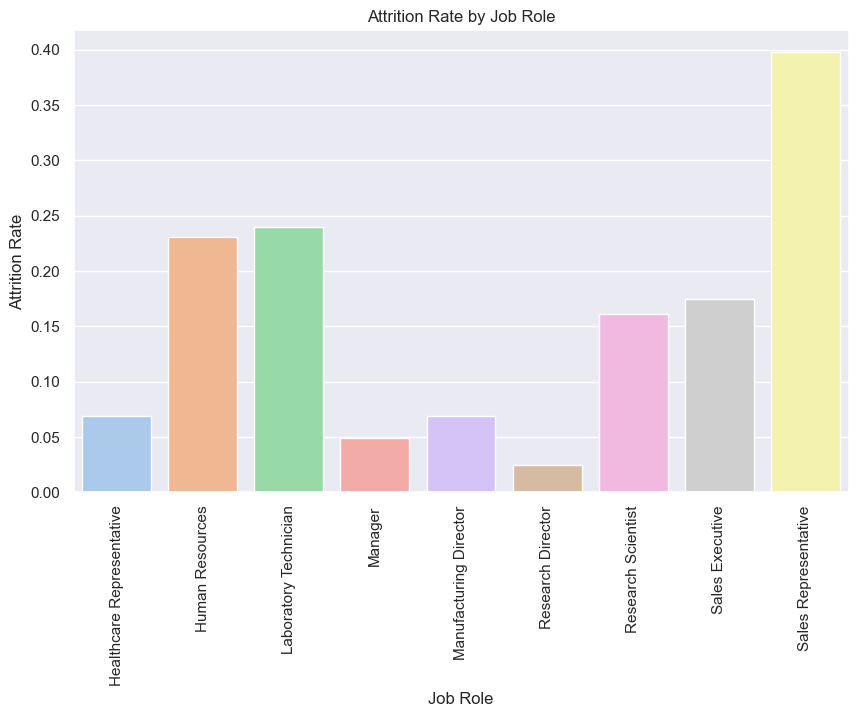

In [669]:
# Bar plot of attrition rates by job role
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values, palette= palette)
ax.set_ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.xticks(rotation=90)

"""It subsets the DataFrame df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.
It calculates the overall correlation between distance from home and attrition for the entire dataset.
It calculates the mean attrition rate by job role."""

It calculates the correlation between distance from home and attrition for each unique job role.

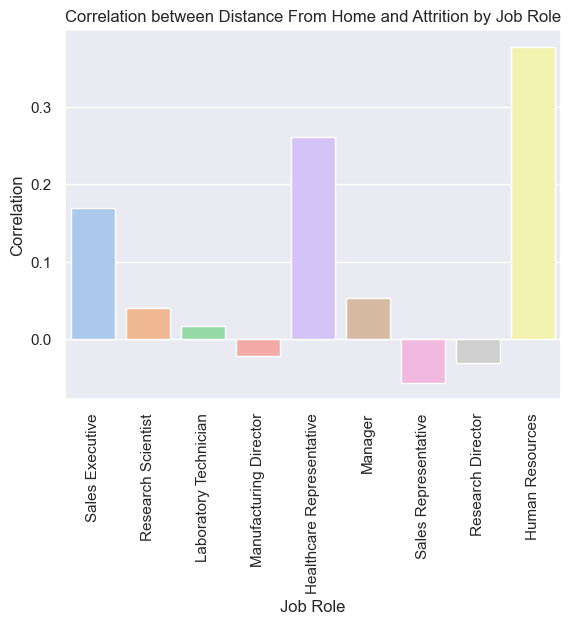

In [670]:
job_roles = df2['JobRole'].unique()

correlations = {} 
for role in job_roles:
    
    subset = df2[df2['JobRole'] == role]
    # subset = Sales Executive, 0.1 , 1
    
    correlation = subset['DistanceFromHome'].corr(subset['Attrition'])
    
    # correlation = Sales Executiv 0.1698105188381547
    correlations[role] = correlation
     
distance_attrition = pd.DataFrame(list(correlations.items()), columns=['Jobrole', 'Correlation'])
ax = sns.barplot(x= 'Jobrole', y= 'Correlation', data = distance_attrition, palette= palette )
ax.set(title='Correlation between Distance From Home and Attrition by Job Role',
       xlabel='Job Role',
       ylabel='Correlation')
plt.xticks(rotation=90);


### 3, How does employee education level affect their monthly income, and does this impact attrition rates?

calculate the average of monthly income by education level

In [661]:
# This line creates a dictionary called education_labels that maps the numeric education levels (1, 2, 3, 4, 5) to their corresponding labels ('Below College', 'College', 'Bachelor', 'Master', 'Doctor').
education_labels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

""" This line creates a new column called 'EducationLabel' in the DataFrame df2 
by replacing the values in the 'Education' column with their corresponding labels from the education_labels dictionary. 
This allows for a more readable representation of education levels in the subsequent analysis."""

df2['EducationLabel'] = df2['Education'].replace(education_labels) 

"""This line groups the data in df2 by the 'Education' column and calculates the average 'MonthlyIncome' for each education level.
The result is stored in the average_income_ed Series."""

average_income_ed = df2.groupby('Education')['MonthlyIncome'].mean()

print(average_income_ed)


Education
1    5640.570588
2    6226.645390
3    6517.263986
4    6832.402010
5    8277.645833
Name: MonthlyIncome, dtype: float64


#### Visualize the average monthly income by education level 

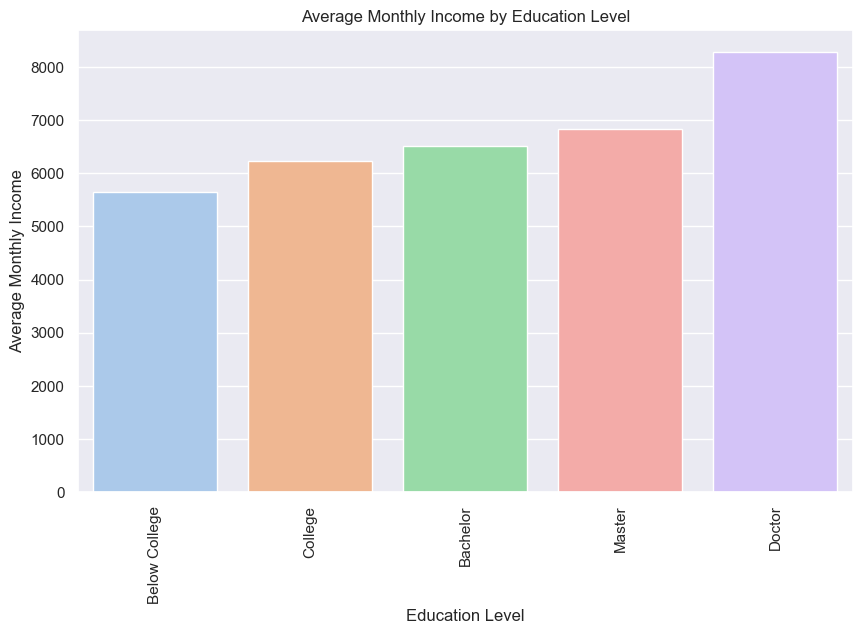

In [671]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_income_ed.index, y=average_income_ed.values, palette= palette)
ax.set(title='Average Monthly Income by Education Level',
       xlabel='Education Level',
       ylabel='Average Monthly Income')
plt.xticks(range(len(education_labels)), education_labels.values(), rotation=90)
plt.show()

#### Analyze the impact of education level on attrition rates

In [ ]:
""" This code groups the data in the DataFrame df2 based on the 'EducationLabel' 
column and calculates the mean attrition rate for each education level. 
The result is stored in the attrition_rate_education Series"""

attrition_rate_education = df2.groupby('EducationLabel')['Attrition'].mean()

print(attrition_rate_education)

EducationLabel
Bachelor         0.173077
Below College    0.182353
College          0.156028
Doctor           0.104167
Master           0.145729
Name: Attrition, dtype: float64


#### Visualize the attrition rates by education level

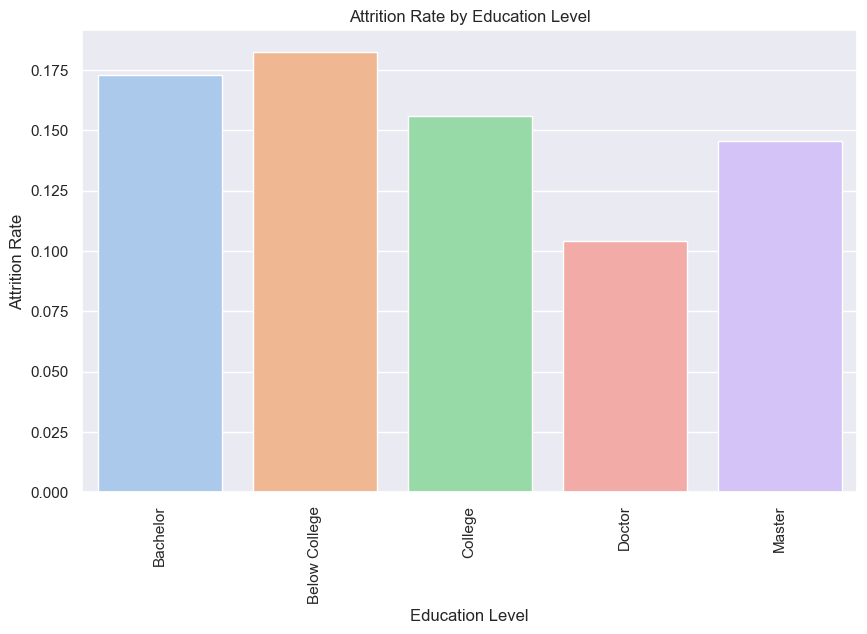

In [672]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=attrition_rate_education.index, y=attrition_rate_education.values, palette= palette )
ax.set(title='Attrition Rate by Education Level',
       xlabel='Education Level',
       ylabel='Attrition Rate')
plt.xticks(rotation=90);

### Attrition compared to EductionField 

In [665]:
subset_df = df2[['Attrition', 'EducationField']]
#Calculate the attrition rate for each education field by grouping the data based on 'EducationField' and calculating the mean of the 'Attrition' column.
attrition_by_education_field = subset_df.groupby('EducationField')['Attrition'].mean()
print(attrition_by_education_field)

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
Name: Attrition, dtype: float64


Visualize attrition rates

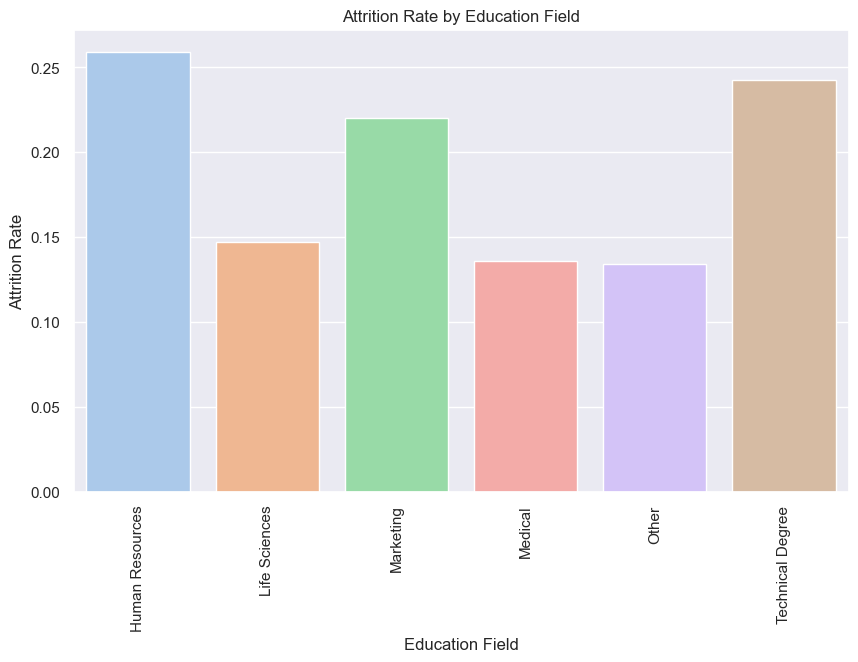

In [673]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = attrition_by_education_field.index, y = attrition_by_education_field.values, palette= palette)
ax.set(title='Attrition Rate by Education Field',
       xlabel='Education Field',
       ylabel='Attrition Rate')
plt.xticks(rotation=90);


### CONCLUSION 

1, Education level and monthly income the avarage monthly income varies based on eduction level. Employees with higer eduction levels, 
such as a Master or Doctorate degree, tend to have higher average monthly incomes compared to those with lower eduction levels. 
the specific average income values for each eduction level can be found in the output of the  avarage_income_ed analysis

2, Education level and Attrition Rate the attrition rate varies based on eduction level. Employess with different eduction levels have different attrition rates. the specific attrition rates for each eduction level can be found in the output of the attriton_rate_eduction analysis

3, Attrition Rate in Eduction Field 



### 4. Are there any gender differences in job satisfaction, and does this impact attrition rates?

In [ ]:
"""This line creates a new DataFrame called subset_df by selecting specific columns from the original DataFrame df2.
The columns included are 'Attrition', 'Gender', and 'JobSatisfaction'. """

subset_df = df2[['Attrition', 'Gender', 'JobSatisfaction']]
subset_df

,Attrition,Gender,JobSatisfaction
0,1,Female,4
1,0,Male,2
2,1,Male,3
3,0,Female,3
4,0,Male,2
...,...,...,...
1465,0,Male,4
1466,0,Male,1
1467,0,Male,2
1468,0,Male,2


1.Find out what gender difference there is in job satisfaction.

In [ ]:
GenderJobSatisfactionCrossTab = pd.crosstab(df['Gender'], df['JobSatisfaction'], margins=True)
GenderJobSatisfactionCrossTab

JobSatisfaction,1,2,3,4,All
Gender,,,,,
Female,119,118,181,170,588
Male,170,162,261,289,882
All,289,280,442,459,1470


In [ ]:
gen_js = GenderJobSatisfactionCrossTab.div(GenderJobSatisfactionCrossTab["All"], axis=0).iloc[:-1, :-1]
gen_js

JobSatisfaction,1,2,3,4
Gender,,,,
Female,0.202381,0.200680,0.307823,0.289116
Male,0.192744,0.183673,0.295918,0.327664


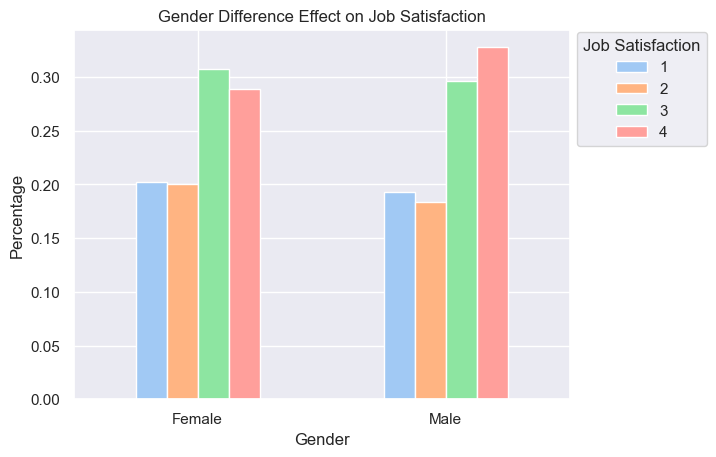

In [ ]:
ax = gen_js.plot(kind='bar', ylabel= 'Percentage', xlabel = 'Gender', title = 'Gender Difference Effect on Job Satisfaction', color= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.legend(loc='center left', title= 'Job Satisfaction', bbox_to_anchor=(1, 0.84));

In [ ]:
GenderCrossTab = pd.crosstab(df['Gender'], df['Attrition'], margins=True)
GenderCrossTab

Attrition,No,Yes,All
Gender,,,
Female,501,87,588
Male,732,150,882
All,1233,237,1470


In [ ]:
GenderCrossTab.div(GenderCrossTab['All'], axis=0)

Attrition,No,Yes,All
Gender,,,
Female,0.852041,0.147959,1.0
Male,0.829932,0.170068,1.0
All,0.838776,0.161224,1.0


Job satisfaction rate VS attrition rate

In [ ]:
JobSatisfactionCrossTab = pd.crosstab(df['JobSatisfaction'],df['Attrition'], margins=True)
JobSatisfactionCrossTab

Attrition,No,Yes,All
JobSatisfaction,,,
1,223,66,289
2,234,46,280
3,369,73,442
4,407,52,459
All,1233,237,1470


In [ ]:
a = JobSatisfactionCrossTab.div(JobSatisfactionCrossTab["All"], axis=0).iloc[:-1, :-1]
a

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290


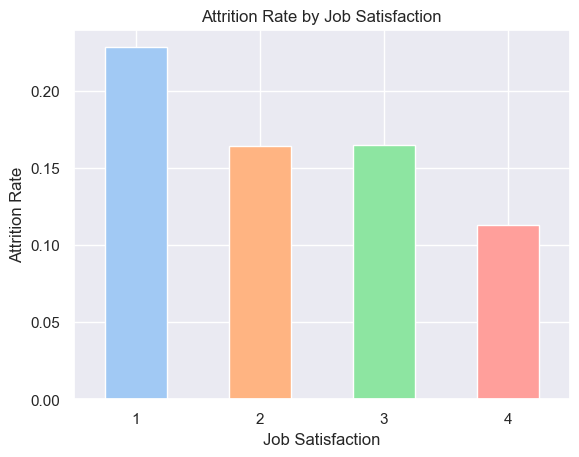

In [ ]:
ax = a['Yes'].plot(kind='bar', ylabel= 'Attrition Rate', xlabel = 'Job Satisfaction', title = 'Attrition Rate by Job Satisfaction', color= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

In [ ]:
AllCrossTab = pd.crosstab(df['JobSatisfaction'],[df['Attrition'],df['Gender']], margins=True)
AllCrossTab

# pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

Attrition           No         Yes        All
Gender          Female Male Female Male      
JobSatisfaction                              
1                   98  125     21   45   289
2                   94  140     24   22   280
3                  155  214     26   47   442
4                  154  253     16   36   459
All                501  732     87  150  1470

In [ ]:
a= AllCrossTab.div(AllCrossTab['All'],axis=0)
a

Attrition              No                 Yes            All
Gender             Female      Male    Female      Male     
JobSatisfaction                                             
1                0.339100  0.432526  0.072664  0.155709  1.0
2                0.335714  0.500000  0.085714  0.078571  1.0
3                0.350679  0.484163  0.058824  0.106335  1.0
4                0.335512  0.551198  0.034858  0.078431  1.0
All              0.340816  0.497959  0.059184  0.102041  1.0

In [ ]:
b=a[['Yes']].iloc[:-1, :]
b

Attrition             Yes          
Gender             Female      Male
JobSatisfaction                    
1                0.072664  0.155709
2                0.085714  0.078571
3                0.058824  0.106335
4                0.034858  0.078431

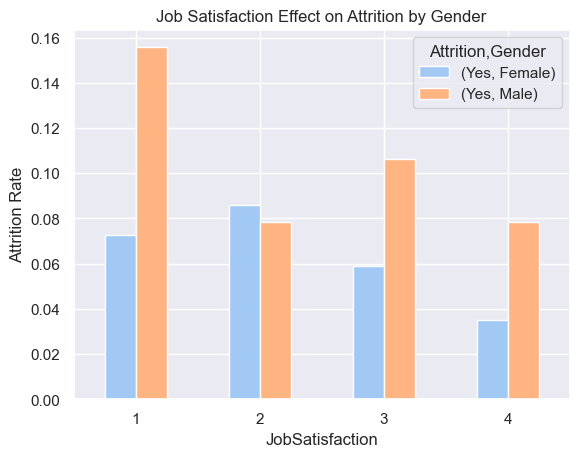

In [ ]:
ax = b.plot(kind='bar', ylabel= 'Attrition Rate', title = 'Job Satisfaction Effect on Attrition by Gender', color= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

CONCLUSION: 

There are some gender differences in Job Satisfaction. As we can see 'Very High' level of Job Satisfaction have 32,8% Male and only 28,9% Female. Despite of that Attrition rate for Male higher (17,0%) than for Female (14,8%).

Job Satisfaction does impact on Attrition rate, so attrition higher among employee with lower levels of Job Satisfaction, and lower - by employee, who's very high Satisfajed of his job. 

And the last plot shows us that tend of the high attrition rate among Male keeps into almost all levels of Job Satisfaction.

## 5, What factors are associated with employee performance ratings, and is there a relationship between performance ratings and attrition?

### a- Factors associated with employee performance ratings 

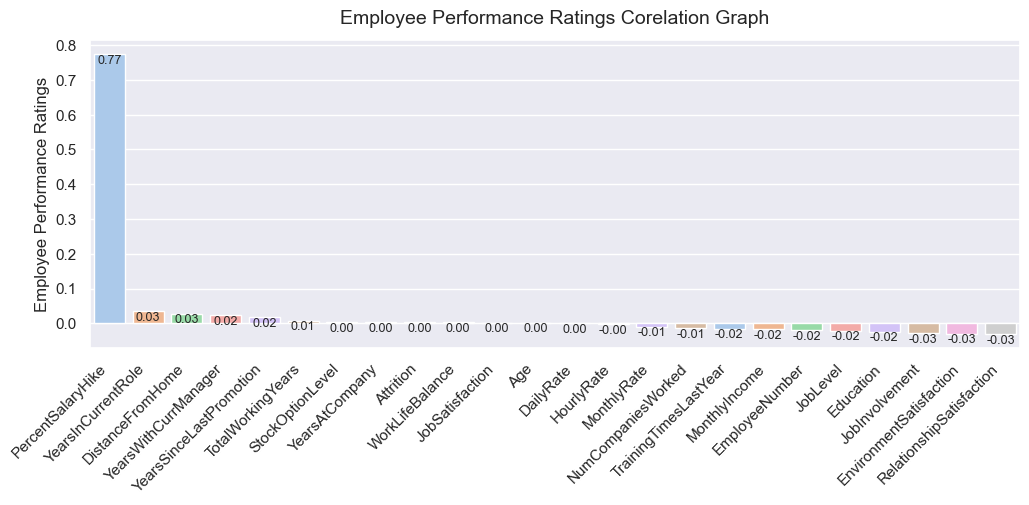

'Percent Salary Hike is the most corelated variable with Performance Rating. it has a strong corelation rate: 0.77'

In [ ]:
plt.figure(figsize=(12, 4))
cor_pr = df2.loc[:, df2.dtypes == 'int64'].corr()[['PerformanceRating']].sort_values(by='PerformanceRating', ascending=False)
ax = sns.barplot( x= cor_pr.index[1:], y= 'PerformanceRating', data= cor_pr[1:], palette= palette, )

plt.xticks(rotation=45, ha='right');
plt.ylabel('Employee Performance Ratings')
ax.set_title('Employee Performance Ratings Corelation Graph', fontdict={'fontsize':14}, pad=12);
# Show bar values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', fontsize=9)

plt.show()


f"""Percent Salary Hike is the most corelated variable with Performance Rating. it has a strong corelation rate: {round(cor_pr.loc["PercentSalaryHike"][0], 2)}"""


### b- Relationship between performance ratings and attrition

In [ ]:
# Calculate the correlation coefficient between 'Attrition' and 'PerformanceRating'
correlation_coefficient = round(df2['Attrition'].corr(df2['PerformanceRating']), 3)
print(f"Correlation coefficient: {correlation_coefficient}")

f"""Correlation coefficient: {correlation_coefficient} is too close to zero, and it means a weak corelation between Employee Performance Ratings and Attrition."""

Correlation coefficient: 0.003


'Correlation coefficient: 0.003 is too close to zero, and it means a weak corelation between Employee Performance Ratings and Attrition.'

In [ ]:
# Calculate the Attrition ratios by PerformanceRating
pr_unique=df2['PerformanceRating'].unique() 
attr_value = 1
result_df= df2.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).loc[:, attr_value] * 100
result_df = result_df.reset_index()
result_df.columns = ['PerformanceRating','AttritionRate']

print(pr_unique)
print(result_df)

f"""Performance Rating column has only 2 unique values which are {pr_unique}."""

[3 4]
   PerformanceRating  AttritionRate
0                  3      16.077170
1                  4      16.371681


'Performance Rating column has only 2 unique values which are [3 4].'

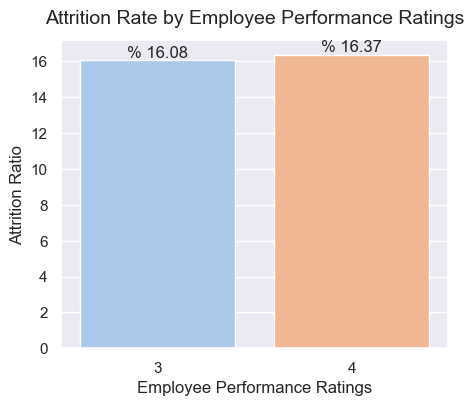

In [116]:

#Visualisation of Attrition rate by Performance Ratio
plt.figure(figsize=(5, 4))
ax = sns.barplot( x= 'PerformanceRating', y= 'AttritionRate', data= result_df, palette= palette)

plt.ylabel('Attrition Ratio')
plt.xlabel('Employee Performance Ratings')
ax.set_title('Attrition Rate by Employee Performance Ratings', fontdict={'fontsize':14}, pad=12);

# Show bar values over them as percentage
for p in ax.patches:
    ax.annotate(f'% {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

Since the difference in Attrition Rate between 2 different performance rating groups is very small, we can conclude that Employee performance rating has no effect on Attrition.